# Graphical Models: Similarity Distribution Experimentation

In [39]:
# Import necessary libraries
from sde import *

# Tests - Edit Distance

In [40]:
def dgWithCliqs(num_cliq):   
    #create DAG
    rand_num_nodes = random.randint(num_cliq, num_cliq*3)
    dg = makeDirectedGraph(rand_num_nodes, int(rand_num_nodes*1.5))
    
    #count num of cliques in graph
    cliq_rem = clique.clique_removal(dg)
    cliqCount = len(cliq_rem[1])   
    
    # remake graph if it doesn't match the input
    if (cliqCount == num_cliq):
        return dg
    else:
        return dgWithCliqs(num_cliq)

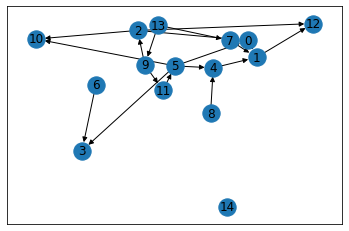

In [41]:
dg = dgWithCliqs(10)
nx.draw_networkx(dg)

Graph with 10 cliques

In [42]:
maxCliqs = clique.clique_removal(dg)
cliqueChoose2 = list(itertools.combinations(maxCliqs[1], 2))
print(cliqueChoose2)

[({0, 1, 7}, {9, 2}), ({0, 1, 7}, {3, 5}), ({0, 1, 7}, {8, 4}), ({0, 1, 7}, {6}), ({0, 1, 7}, {10}), ({0, 1, 7}, {11}), ({0, 1, 7}, {12}), ({0, 1, 7}, {13}), ({0, 1, 7}, {14}), ({9, 2}, {3, 5}), ({9, 2}, {8, 4}), ({9, 2}, {6}), ({9, 2}, {10}), ({9, 2}, {11}), ({9, 2}, {12}), ({9, 2}, {13}), ({9, 2}, {14}), ({3, 5}, {8, 4}), ({3, 5}, {6}), ({3, 5}, {10}), ({3, 5}, {11}), ({3, 5}, {12}), ({3, 5}, {13}), ({3, 5}, {14}), ({8, 4}, {6}), ({8, 4}, {10}), ({8, 4}, {11}), ({8, 4}, {12}), ({8, 4}, {13}), ({8, 4}, {14}), ({6}, {10}), ({6}, {11}), ({6}, {12}), ({6}, {13}), ({6}, {14}), ({10}, {11}), ({10}, {12}), ({10}, {13}), ({10}, {14}), ({11}, {12}), ({11}, {13}), ({11}, {14}), ({12}, {13}), ({12}, {14}), ({13}, {14})]


In [43]:
cliq_imm_sim = []
for pair in cliqueChoose2:
    imm_sim = get_immediate_similarity(dg, pair[0], pair[1])
    cliq_imm_sim.append(imm_sim)
    print(pair, imm_sim)

({0, 1, 7}, {9, 2}) 0.6990181250715076
({0, 1, 7}, {3, 5}) 0.9171667292533089
({0, 1, 7}, {8, 4}) 0.8651777652858911
({0, 1, 7}, {6}) 1.0
({0, 1, 7}, {10}) 1.0
({0, 1, 7}, {11}) 1.0
({0, 1, 7}, {12}) 1.0
({0, 1, 7}, {13}) 1.0
({0, 1, 7}, {14}) 1.0
({9, 2}, {3, 5}) 0.760438440330617
({9, 2}, {8, 4}) 1.0
({9, 2}, {6}) 1.0
({9, 2}, {10}) 1.0
({9, 2}, {11}) 1.0
({9, 2}, {12}) 1.0
({9, 2}, {13}) 1.0
({9, 2}, {14}) 1.0
({3, 5}, {8, 4}) 0.7869771499879363
({3, 5}, {6}) 0.8157015697205061
({3, 5}, {10}) 1.0
({3, 5}, {11}) 1.0
({3, 5}, {12}) 1.0
({3, 5}, {13}) 1.0
({3, 5}, {14}) 1.0
({8, 4}, {6}) 1.0
({8, 4}, {10}) 1.0
({8, 4}, {11}) 1.0
({8, 4}, {12}) 1.0
({8, 4}, {13}) 1.0
({8, 4}, {14}) 1.0
({6}, {10}) 1.0
({6}, {11}) 1.0
({6}, {12}) 1.0
({6}, {13}) 1.0
({6}, {14}) 1.0
({10}, {11}) 0
({10}, {12}) 0
({10}, {13}) 0
({10}, {14}) 0
({11}, {12}) 1.0
({11}, {13}) 1.0
({11}, {14}) 1.0
({12}, {13}) 0
({12}, {14}) 0
({13}, {14}) 1.0


# Edit Distance, immediate similarity

Between cliques

In [44]:
#function that accepts a graph, returns a list of all the immediate similarity values between clique pairs. 
#Do the same for node pairs.

def immSimCliqs(dg):
    cliq_rem = clique.clique_removal(dg)
    maxCliqs = cliq_rem[1]
    cliqueChoose2 = list(itertools.combinations(maxCliqs, 2))
    cliq_imm_sim = []
    for pair in cliqueChoose2:
        imm_sim = get_immediate_similarity(dg, pair[0], pair[1])
        cliq_imm_sim.append(imm_sim)
        #print(pair, imm_sim)
    return cliq_imm_sim

In [45]:
cliqNums = [10, 30, 50, 80]
immSims = {}
avgImmSims = {}

for c in cliqNums:
    dg = dgWithCliqs(c)
    
    immSimsVals = immSimCliqs(dg)
    immSims[str(c) + ' cliques'] = immSimsVals
    
    avgIS = mean(immSimsVals)
    avgImmSims[str(c)] = avgIS

#print(immSims)
#print(avgImmSims)

In [46]:
immSim_df = pd.DataFrame({ key:pd.Series(value) for key, value in immSims.items() })
immSim_df

,10 cliques,30 cliques,50 cliques,80 cliques
0,1.000000,0.817556,1.0,1.000000
1,1.000000,0.861220,1.0,1.000000
2,0.623682,1.000000,1.0,1.000000
3,0.892786,0.814586,1.0,1.000000
4,1.000000,1.000000,1.0,0.732723
...,...,...,...,...
3155,NaN,NaN,NaN,1.000000
3156,NaN,NaN,NaN,1.000000
3157,NaN,NaN,NaN,0.000000
3158,NaN,NaN,NaN,0.000000


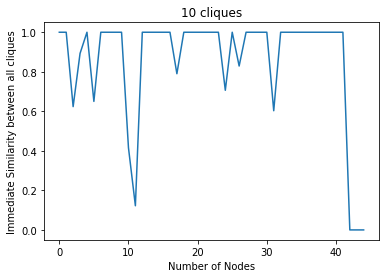

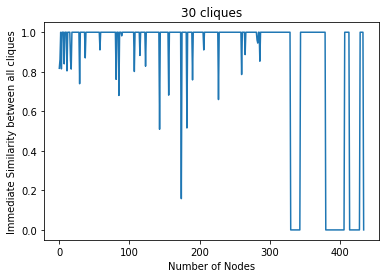

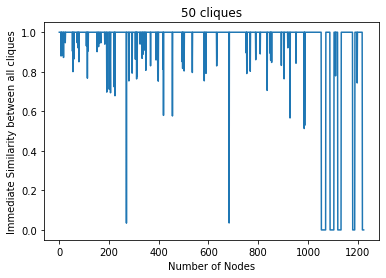

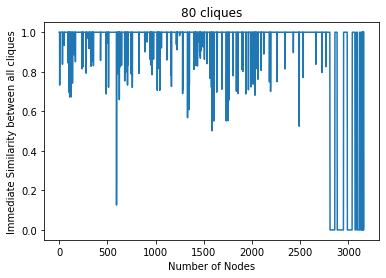

In [47]:
# plot to compare immediate similarity values against number of cliques
for key in immSims.keys():
    plt.plot(list(immSims.get(key)))
    plt.title(key)
    plt.ylabel("Immediate Similarity between all cliques")
    plt.xlabel('Number of Nodes')
    plt.show()

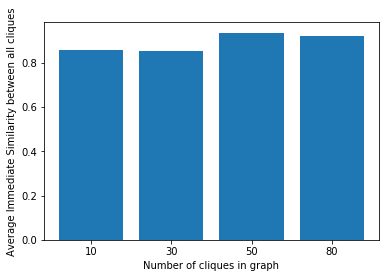

In [48]:
# bar chart to compare average immediate similarity values against number of cliques 
plt.bar(range(len(avgImmSims)), avgImmSims.values(), align='center')
plt.xticks(range(len(avgImmSims)), list(avgImmSims.keys()))
plt.ylabel('Average Immediate Similarity between all cliques')
plt.xlabel('Number of cliques in graph')
plt.show()


For entire graphs

In [49]:
cliqNums = [10, 30, 50, 80]
graphImmSims = {}
avgGraphIS = {}
for c in cliqNums:
    gm = dgWithCliqs(c)
    node_list = list(gm.nodes)
    node_pairs = list(it.combinations(node_list, 2))
    
    ed_imm_sim = []
    for pair in node_pairs:
        ed_imm_sim.append(get_immediate_similarity(gm, pair[0], pair[1]))
        ed_imm_sim.append(get_immediate_similarity(gm, pair[1], pair[0]))
        
    graphImmSims[str(c)] = ed_imm_sim
    avgGraphIS[str(c)] = mean(ed_imm_sim)

In [50]:
graphIS_df = pd.DataFrame({ key:pd.Series(value) for key, value in graphImmSims.items() })
graphIS_df

,10,30,50,80
0,1.0,0.0,1.0,1.0
1,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0
...,...,...,...,...
18085,NaN,NaN,NaN,1.0
18086,NaN,NaN,NaN,1.0
18087,NaN,NaN,NaN,1.0
18088,NaN,NaN,NaN,1.0


In [51]:
"""# plot to compare immediate similarity values against number of cliques
for key in graphImmSims.keys():
    plt.plot(list(graphImmSims.get(key)))
    plt.title(key)
    plt.ylabel("Immediate Similarity")
    plt.xlabel('Number of Nodes')
    plt.show()"""

'# plot to compare immediate similarity values against number of cliques\nfor key in graphImmSims.keys():\n    plt.plot(list(graphImmSims.get(key)))\n    plt.title(key)\n    plt.ylabel("Immediate Similarity")\n    plt.xlabel(\'Number of Nodes\')\n    plt.show()'

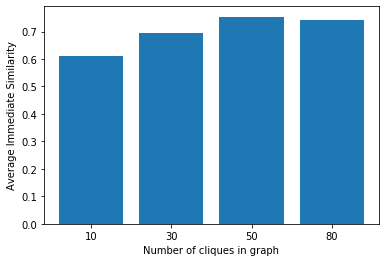

In [52]:
# bar chart to compare average immediate similarity values against number of cliques 
plt.bar(range(len(avgGraphIS)), avgGraphIS.values(), align='center')
plt.xticks(range(len(avgGraphIS)), list(avgGraphIS.keys()))
plt.ylabel('Average Immediate Similarity')
plt.xlabel('Number of cliques in graph')
plt.show()

# Edit distance, full similarity

between all  cliques

In [53]:
def fullSimCliqs(dg):
    cliq_rem = clique.clique_removal(dg)
    maxCliqs = cliq_rem[1]
    cliqueChoose2 = list(itertools.combinations(maxCliqs, 2))
    cliq_full_sim = []
    for pair in cliqueChoose2:
        fullSim = get_full_similarity(dg, pair[0], pair[1])
        cliq_full_sim.append(fullSim)
        #print(pair, imm_sim)
    return cliq_full_sim

In [ ]:
cliqNums = [10, 30, 50, 80]
fullSims = {}
avgFS = {}
for c in cliqNums:
    gm = dgWithCliqs(c)
    node_list = list(gm.nodes)
    node_pairs = list(it.combinations(node_list, 2))
    
    ed_full_sim = []
    for pair in node_pairs:
        ed_full_sim.append(get_full_similarity(gm, pair[0], pair[1]))
        ed_full_sim.append(get_full_similarity(gm, pair[1], pair[0]))
        
    fullSims[str(c)] = ed_full_sim
    avgFS[str(c)] = mean(ed_full_sim)

In [ ]:
"""# plot to compare immediate similarity values against number of cliques
for key in fullSims.keys():
    plt.plot(list(fullSims.get(key)))
    plt.title(key + ' cliques')
    plt.ylabel("Full Similarity between cliques")
    plt.xlabel('Number of Nodes')
    plt.show()"""

In [ ]:
# bar chart to compare average full similarity values against number of cliques 
plt.bar(range(len(avgFS)), avgFS.values(), align='center')
plt.xticks(range(len(avgFS)), list(avgFS.keys()))
plt.ylabel('Average Full Similarity')
plt.xlabel('Number of cliques in graph')
plt.show()


In [ ]:
fullSims_df = pd.DataFrame({ key:pd.Series(value) for key, value in fullSims.items() })
fullSims_df

for entire graph

In [ ]:
cliqNums = [10, 30, 50, 80]
graphFS = {}
avgGraphFS = {}
for c in cliqNums:
    gm = dgWithCliqs(c)
    node_list = list(gm.nodes)
    node_pairs = list(it.combinations(node_list, 2))
    
    graph_full_sim = []
    for pair in node_pairs:
        graph_full_sim.append(get_full_similarity(gm, pair[0], pair[1]))
        graph_full_sim.append(get_full_similarity(gm, pair[1], pair[0]))
        
    graphFS[str(c)] = graph_full_sim
    avgGraphFS[str(c)] = mean(graph_full_sim)

In [ ]:
"""# plot to compare immediate similarity values against number of cliques
for key in graphFS.keys():
    plt.plot(list(graphFS.get(key)))
    plt.title(key + ' cliques')
    plt.ylabel("Full Similarity")
    plt.xlabel('Number of Nodes')
    plt.show()"""

In [ ]:
# bar chart to compare average full similarity values against number of cliques 
plt.bar(range(len(avgGraphFS)), avgGraphFS.values(), align='center')
plt.xticks(range(len(avgGraphFS)), list(avgGraphFS.keys()))
plt.ylabel('Average Full Similarity')
plt.xlabel('Number of cliques in graph')
plt.show()


In [ ]:
graphFS_df = pd.DataFrame({ key:pd.Series(value) for key, value in graphFS.items() })
graphFS_df

# Similarity method: Jaccard Index

In [ ]:
cliqNums = [10, 30, 50]
jindices = {}
avgJI = {}
for c in cliqNums:
    gm = dgWithCliqs(c)
    node_list = list(gm.nodes)
    node_pairs = list(it.combinations(node_list, 2))
    print(node_pairs)
    
    ji_sim_1 = []
    for pair in node_pairs:
        ji_sim_1.append(calculate_jaccard_similarity(gm, pair[0], pair[1])["method 1"])
        ji_sim_1.append(calculate_jaccard_similarity(gm, pair[1], pair[0])["method 1"])
        
    jindices[str(c)] = ji_sim_1
    avgJI[str(c)] = mean(ji_sim_1)

In [ ]:
# plot to compare Jaccard similarity against number of cliques
for key in jindices.keys():
    plt.plot(list(jindices.get(key)))
    plt.title(key + ' cliques')
    plt.ylabel("Jaccard Index")
    plt.xlabel('Number of Nodes')
    plt.show()

In [ ]:
# bar chart to compare average Jaccard similarity against number of cliques 
plt.bar(range(len(avgJI)), avgJI.values(), align='center')
plt.xticks(range(len(avgJI)), list(avgJI.keys()))
plt.ylabel('Average Jaccard Index')
plt.xlabel('Number of cliques in graph')
plt.show()

In [ ]:
jindices_df = pd.DataFrame({ key:pd.Series(value) for key, value in jindices.items() })
jindices_df